# Char RNN
***

### Data:
18 Dr. Seuss Books, 80339 characters

Char-Sequence Length = 100

### Model: 

2-layer LSTM, 700 hidden states, dropout ratio = 0.2

### Training:
5 epochs, batch size of 1000

---

### Results: 
**Loss: 2.8886**

the sun did not shine. it was too wet to play. so we sat in the house all that cold, cold, wet day. the ho the th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th

---

## 1. Import Text Data

In [1]:
total = ""
data = ""

In [2]:
import os
directory = "texts/individual/"
files = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(directory+filename, "r") as myfile:
            data = myfile.read().replace('\n', ' ')
        files.append(filename)
    total = total + data

In [3]:
# Replace commas
total = total.replace("\xe2\x80\x99", "\'")
# Replace ...
total = total.replace("\xe2\x80\xa6", "...")
# Replace quotations
total = total.replace('\xe2\x80\x9c','"')
total = total.replace('\xe2\x80\x9d','"')
# Replace backslashes
total = total.replace("\\", "")
# Convert to lowercase
total = total.lower()

In [4]:
files

['the-cat-in-a-hat.txt',
 'horton-hears-a-who.txt',
 'ten-apples-up-on-top.txt',
 'wacky-wednesday.txt',
 'happy-birthday-to-you.txt',
 'if-i-ran-the-zoo.txt',
 'the-butter-battle-book.txt',
 'the-foot-book.txt',
 'oh-the-places-youll-go.txt',
 'the-sneetches.txt',
 'the-lorax.txt',
 'marvin-k-mooney-will-you-please-go-now.txt',
 'i-can-read-with-my-eyes-shut.txt',
 'wocket-in-my-pocket.txt',
 'hop-on-pop.txt',
 'how-the-grinch-stole-christmas.txt',
 'one-fish-two-fish-red-fish-blue-fish.txt',
 'mr-brown-can-moo-can-you.txt',
 'fox-in-socks.txt',
 'green-eggs-and-ham.txt',
 'in-a-people-house.txt']

In [5]:
len(total)

85028

## 2. Create Char Dictionary

In [6]:
def create_dict(texts):
    wl = {}
    for char in texts:
        if char not in wl:
            wl[char] = 1
        else:
            wl[char] += 1
    return wl

In [7]:
import operator
d = create_dict(total)
sorted_d = sorted(d.items(), key=lambda x: x[1], reverse=True)

In [8]:
# create a string composed of irrelevant characters (used less than 50 times)
unwanted_chars = ""
for c in sorted_d:
    if c[1] < 50:
        print(c)
        unwanted_chars = unwanted_chars+str(c[0])

('\xad', 10)
(':', 10)
('\xc2', 10)
('_', 10)
('\x80', 6)
('\xe2', 6)
('\x98', 5)
('1', 5)
('5', 4)
('\xef', 3)
(')', 3)
('0', 3)
('3', 3)
('2', 3)
('(', 3)
('6', 3)
('\xbf', 3)
('4', 3)
('\xbb', 2)
(';', 2)
('/', 1)
('9', 1)
('8', 1)
('\xbd', 1)
('\xbe', 1)
('\xcd', 1)
('\x94', 1)


In [9]:
# remove irrelevant characters from text data 
total=total.translate(None,unwanted_chars)

In [10]:
d = create_dict(total)
sorted_d = sorted(d.items(), key=lambda x: x[1], reverse=True)

In [11]:
print('Dictionary Size: %d' % len(sorted_d))

Dictionary Size: 34


In [12]:
print('Dictionary:\n %s' % sorted_d)

Dictionary:
 [(' ', 17149), ('e', 7122), ('o', 5735), ('t', 5557), ('a', 4842), ('h', 4180), ('n', 3987), ('i', 3912), ('s', 3653), ('r', 3052), ('l', 2999), ('d', 2499), ('u', 2117), ('w', 1818), ('.', 1808), ('y', 1602), ('m', 1568), ('c', 1434), ('g', 1398), ('p', 1196), ('f', 1124), ('k', 1111), ('b', 1095), (',', 961), ('!', 712), ('"', 521), ("'", 486), ('v', 445), ('-', 244), ('x', 167), ('?', 136), ('z', 129), ('j', 108), ('q', 57)]


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
cx = []
cy = []
for c in sorted_d:
    cx.append(c[0])
    cy.append(c[1])

In [15]:
cx = np.array(cx)
cy = np.array(cy)
ind = np.arange(len(cy))

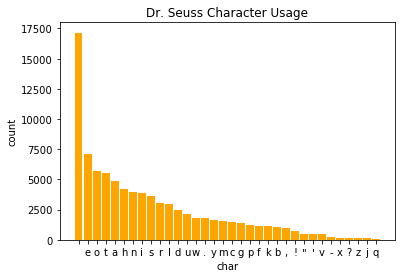

In [16]:
plt.bar(ind, cy, tick_label=cx, color='orange')
plt.title('Dr. Seuss Character Usage')
plt.xlabel('char')
plt.ylabel('count')
plt.show()

## 3. Vectorize on Char Dict

In [17]:
SEQ_LENGTH = 100

In [18]:
characters = []
for pair in sorted_d:
    characters.append(pair[0])

In [19]:
n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [20]:
import numpy as np
from keras.utils import np_utils
X = []
Y = []
length = len(total)
for i in range(0, length - SEQ_LENGTH, 1):
    sequence = total[i:i + SEQ_LENGTH]
    label = total[i + SEQ_LENGTH]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

Using TensorFlow backend.


In [21]:
X_mod = np.reshape(X, (len(X), SEQ_LENGTH, 1))
X_mod = X_mod / float(len(characters))
Y_mod = np_utils.to_categorical(Y)

In [22]:
X_mod.shape

(84824, 100, 1)

## 4. LSTM Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

In [24]:
model = Sequential()
model.add(LSTM(700, input_shape=(X_mod.shape[1], X_mod.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(700))
model.add(Dropout(0.2))
model.add(Dense(Y_mod.shape[1], activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [25]:
#model.fit(X_mod, Y_mod, epochs=5, batch_size=1000)
#model.save_weights('models/dr-seuss-700-0.2-700-0.2-5-epochs.h5')

In [26]:
model.load_weights('models/dr-seuss-700-0.2-700-0.2-5-epochs.h5')

## 5. Generate Text

In [27]:
string_mapped = list(X[0])
full_string = [n_to_char[value] for value in string_mapped]
# Number of characters in generated passage
TEXT_LENGTH = 1000
for i in range(TEXT_LENGTH):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))
    
    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    
    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [28]:
#combining text
txt=""
for char in full_string:
    txt = txt+char
print(txt[:SEQ_LENGTH])

the sun did not shine. it was too wet to play. so we sat in the house all that cold, cold, wet day. 


In [29]:
print(txt)

the sun did not shine. it was too wet to play. so we sat in the house all that cold, cold, wet day. the ho the th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th t